# 15 - Plotly plots codanics

In [2]:
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. Scatter plot

In [5]:
fig = px.scatter(df, x ='petal_length', y='sepal_length', color='species')

fig.update_layout(title='Xyz', xaxis_title='Petal Length',
                  yaxis_title='Sepal length',
                  title_x= 0.5)
fig.show()

# 2. Line chart

In [6]:
df_sort = df.sort_values(by=['sepal_length']) 

fig = px.line(df_sort, x='petal_length', y='sepal_length', color='species')

fig.show()

# 3. Bar chart

In [7]:
df_data = df.groupby(['species']).mean().reset_index()
fig = px.bar(df_data, x='species', y='sepal_length')
fig.show() #efef

### seaborn bar chart (donot require to take out the average)

<Axes: xlabel='species', ylabel='sepal_length'>

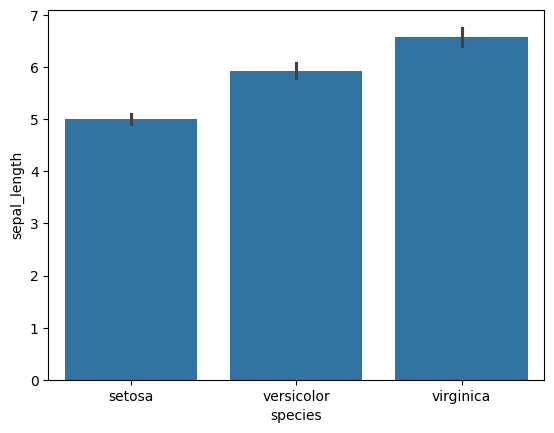

In [8]:
sns.barplot(df, x='species', y='sepal_length')

### Box plot

In [9]:
fig = px.box(df, x='species', y='sepal_width', color='species')
fig.show()

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Histogram

In [11]:
# fig = px.histogram(df, x='sepal_width')  normal but for 3 categories we can use the below
fig = px.histogram(df, x='sepal_width', color='species')
fig.show()

## Pie Chart

In [12]:
fig = px.pie(df, names='species')
fig.show()

### 3D scatter plots

* If we save it we can use it in *blogs* as files will be saved as HTML

In [13]:
fig = px.scatter_3d(df,x='sepal_length',y='sepal_width', z='petal_length', color='species')
fig.show()

## Area chart

In [14]:
fig = px.area(df, x='sepal_width', y='sepal_length', color='species')
fig.show()

> We can see that how each point has taken the place and how blue point is inside the red.
> If we filter and remove virginica we can see that how much points are inside the red which is versicolor.

## Bubble chart

In [15]:
fig = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig.show()

## Sunburst chart

In [16]:
df_sunburst =  df.groupby(['species','petal_width']).size().reset_index(name='counts')

fig = px.sunburst(df_sunburst, path=['species', 'petal_width'], values="counts")
fig.show()

# Parallel corrdinate plot

In [17]:
# Add a numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel Coordinates Plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'},
                                color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()


In [23]:
fig = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig.show()

> We can find outliers easily in this also it shows the relationships

## Ternary plot

In [24]:
# Ternary Plot

fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()

## Polar chart (Radar Chart)

In [25]:
# Polar chart (Radar Chart)

df_radar = df.groupby(['species']).mean().reset_index()

fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()